In [ ]:
# 1. Cài đặt thư viện chính chủ Ultralytics và Roboflow
!pip install ultralytics roboflow
from IPython.display import display, Image
import os

# 2. Kiểm tra xem đã nhận GPU chưa
!nvidia-smi

print("✅ Đã cài xong môi trường!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.7/91.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 79.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
Thu Jan 22 09:33:55 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Drive

In [ ]:
  !pip install roboflow

  from roboflow import Roboflow
  rf = Roboflow(api_key="EmY26Ik4IZIW8iOyGxVL")
  project = rf.workspace("nguyn-cng-tuyn").project("my-first-project-usuhh-7gecz")
  version = project.version(2)
  dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to My-First-Project-2 in yolov8:: 100%|██████████| 16522/16522 [00:01<00:00, 8966.44it/s] 


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from ultralytics import YOLO


model = YOLO('yolov8n.pt')

# 2. Train
results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=50,
    imgsz=640,       # Kích thước ảnh chuẩn
    batch=16,        # Số ảnh học cùng lúc (16 là an toàn cho GPU T4)
    plots=True       # Vẽ biểu đồ sau khi xong
)

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/My-First-Project-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, pl

In [ ]:
from google.colab import drive
import shutil

# 1. Kết nối Google Drive (Nó sẽ hỏi quyền, hãy bấm Allow/Cho phép)
drive.mount('/content/drive')

# 2. Tạo thư mục để lưu trên Drive
drive_folder = '/content/drive/MyDrive/YOLO_Training_Result'
os.makedirs(drive_folder, exist_ok=True)

# 3. Copy file model xịn nhất về

source_path = '/content/runs/detect/train/weights/best.pt'
destination_path = f'{drive_folder}/best.pt'

shutil.copy(source_path, destination_path)
print(f"🎉 Đã lưu model thành công tại: {destination_path}")

Mounted at /content/drive
🎉 Đã lưu model thành công tại: /content/drive/MyDrive/YOLO_Training_Result/best.pt


⬇️ Hãy chọn file ảnh biển số xe từ máy tính của bạn...


Saving Xe-Bien-So-Dep-4.jpg to Xe-Bien-So-Dep-4.jpg

image 1/1 /content/Xe-Bien-So-Dep-4.jpg: 448x640 3 0s, 55.2ms
Speed: 3.2ms preprocess, 55.2ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


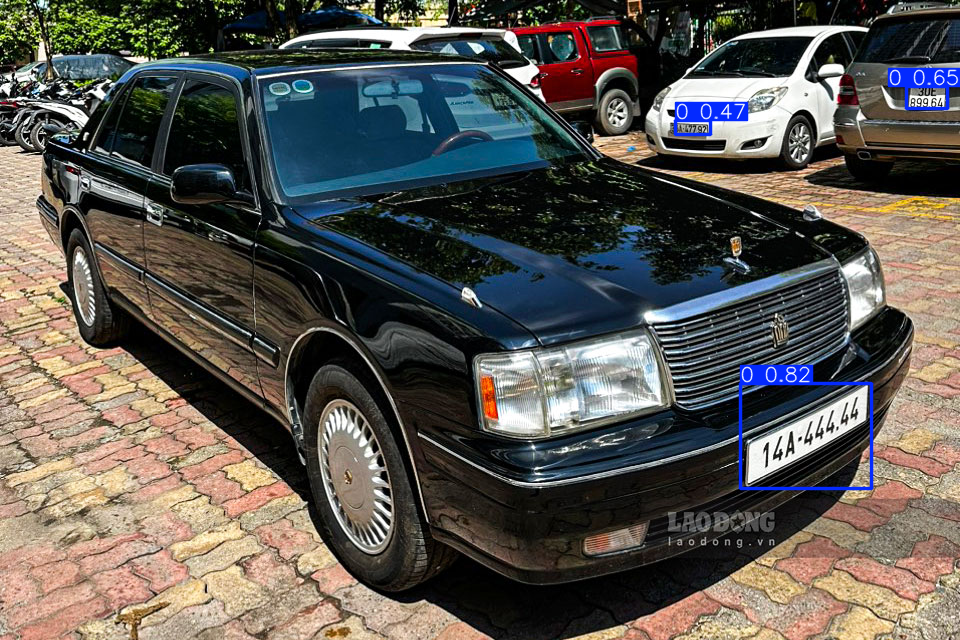

In [ ]:
from google.colab import files
from ultralytics import YOLO
from PIL import Image
import cv2
import numpy as np
from IPython.display import display

print("⬇️ Hãy chọn file ảnh biển số xe từ máy tính của bạn...")
uploaded = files.upload()
filename = next(iter(uploaded)) # Lấy tên file vừa upload

model_path = '/content/drive/MyDrive/YOLO_Training_Result/best.pt'
model = YOLO(model_path)

results = model(filename)

for r in results:
    # Vẽ khung chữ nhật (Bounding Box) lên ảnh
    im_array = r.plot()
    # Chuyển đổi màu từ BGR (OpenCV) sang RGB (để hiển thị đúng màu)
    im_rgb = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)
    # Hiển thị ảnh
    display(Image.fromarray(im_rgb))

⬇️ Hãy chọn file ảnh biển số xe từ máy tính của bạn...


Saving sieu_xe_zing_3.webp to sieu_xe_zing_3.webp

image 1/1 /content/sieu_xe_zing_3.webp: 448x640 1 0, 8.5ms
Speed: 2.9ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


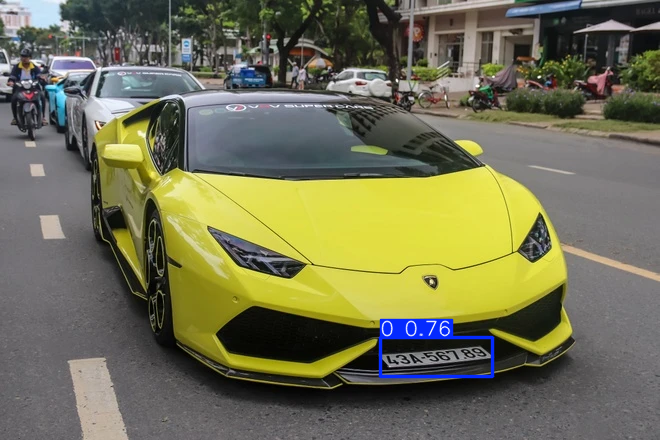

In [ ]:
from google.colab import files
from ultralytics import YOLO
from PIL import Image
import cv2
import numpy as np
from IPython.display import display

print("⬇️ Hãy chọn file ảnh biển số xe từ máy tính của bạn...")
uploaded = files.upload()
filename = next(iter(uploaded)) # Lấy tên file vừa upload

model_path = '/content/drive/MyDrive/YOLO_Training_Result/best.pt'
model = YOLO(model_path)

results = model(filename)

for r in results:
    # Vẽ khung chữ nhật (Bounding Box) lên ảnh
    im_array = r.plot()
    # Chuyển đổi màu từ BGR (OpenCV) sang RGB (để hiển thị đúng màu)
    im_rgb = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)
    # Hiển thị ảnh
    display(Image.fromarray(im_rgb))

⬇️ Hãy chọn file ảnh biển số xe từ máy tính của bạn...


Saving bien-so-xe-o-to.jpg to bien-so-xe-o-to.jpg

image 1/1 /content/bien-so-xe-o-to.jpg: 384x640 1 0, 6.4ms
Speed: 1.5ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


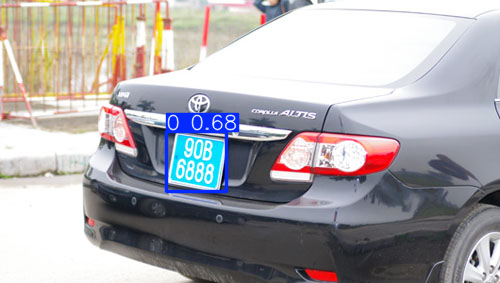

In [ ]:
from google.colab import files
from ultralytics import YOLO
from PIL import Image
import cv2
import numpy as np
from IPython.display import display

print("⬇️ Hãy chọn file ảnh biển số xe từ máy tính của bạn...")
uploaded = files.upload()
filename = next(iter(uploaded)) # Lấy tên file vừa upload

model_path = '/content/drive/MyDrive/YOLO_Training_Result/best.pt'
model = YOLO(model_path)

results = model(filename)

for r in results:
    # Vẽ khung chữ nhật (Bounding Box) lên ảnh
    im_array = r.plot()
    # Chuyển đổi màu từ BGR (OpenCV) sang RGB (để hiển thị đúng màu)
    im_rgb = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)
    # Hiển thị ảnh
    display(Image.fromarray(im_rgb))

⬇️ Hãy chọn file ảnh biển số xe từ máy tính của bạn...


Saving 1.jpg to 1.jpg

image 1/1 /content/1.jpg: 384x640 1 0, 17.2ms
Speed: 3.6ms preprocess, 17.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


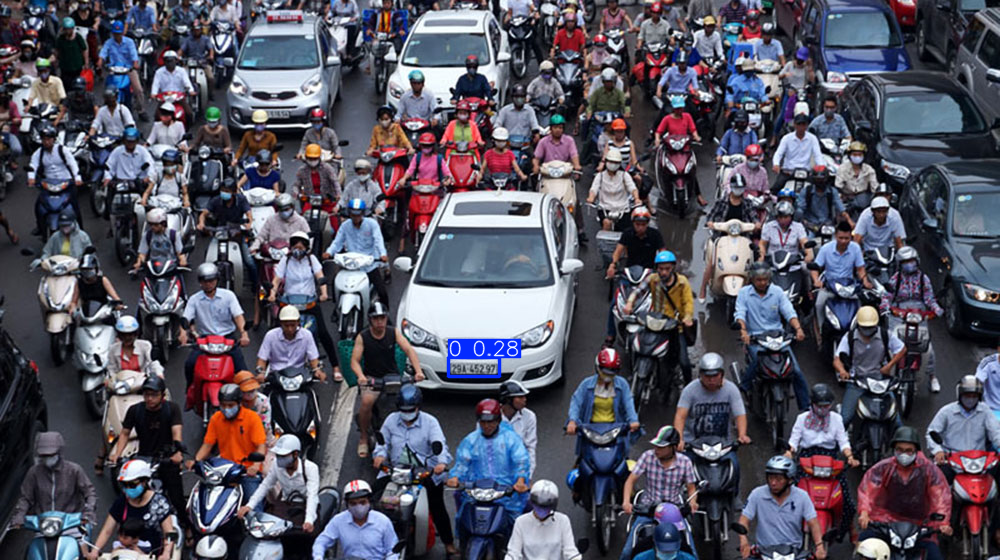

In [ ]:
from google.colab import files
from ultralytics import YOLO
from PIL import Image
import cv2
import numpy as np
from IPython.display import display

print("⬇️ Hãy chọn file ảnh biển số xe từ máy tính của bạn...")
uploaded = files.upload()
filename = next(iter(uploaded)) # Lấy tên file vừa upload

model_path = '/content/drive/MyDrive/YOLO_Training_Result/best.pt'
model = YOLO(model_path)

results = model(filename)

for r in results:
    # Vẽ khung chữ nhật (Bounding Box) lên ảnh
    im_array = r.plot()
    # Chuyển đổi màu từ BGR (OpenCV) sang RGB (để hiển thị đúng màu)
    im_rgb = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)
    # Hiển thị ảnh
    display(Image.fromarray(im_rgb))

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: '0'}
obb: None
orig_img: array([[[ 53,  48,  50],
        [ 49,  47,  53],
        [ 47,  50,  64],
        ...,
        [  8,   2,   0],
        [  7,   1,   0],
        [  7,   1,   0]],

       [[ 83,  76,  79],
        [ 70,  65,  74],
        [ 57,  58,  72],
        ...,
        [ 12,   6,   1],
        [ 11,   5,   0],
        [ 10,   4,   0]],

       [[106,  96, 102],
        [ 86,  78,  88],
        [ 71,  68,  83],
        ...,
        [ 17,  11,   6],
        [ 23,  17,  12],
        [ 27,  21,  16]],

       ...,

       [[ 19,  13,  14],
        [ 19,  13,  14],
        [ 20,  14,  15],
        ...,
        [207, 181, 165],
        [198, 175, 167],
        [177, 158, 153]],

       [[ 19,  13,  14],
        [ 20,  14,  15],
        [ 21,  15,  16],
        ...,
        [193, 161, 142],
        [174, 147, 137],
        [148, 126

Các tệp trong thư mục /content/runs/detect/train:
val_batch0_labels.jpg
train_batch14400.jpg
train_batch14402.jpg
val_batch2_pred.jpg
train_batch1.jpg
BoxR_curve.png
train_batch2.jpg
confusion_matrix.png
val_batch0_pred.jpg
labels.jpg
train_batch14401.jpg
val_batch1_pred.jpg
BoxPR_curve.png
val_batch1_labels.jpg
train_batch0.jpg
results.csv
BoxP_curve.png
args.yaml
weights
val_batch2_labels.jpg
confusion_matrix_normalized.png
BoxF1_curve.png
results.png

Hiển thị results.png:


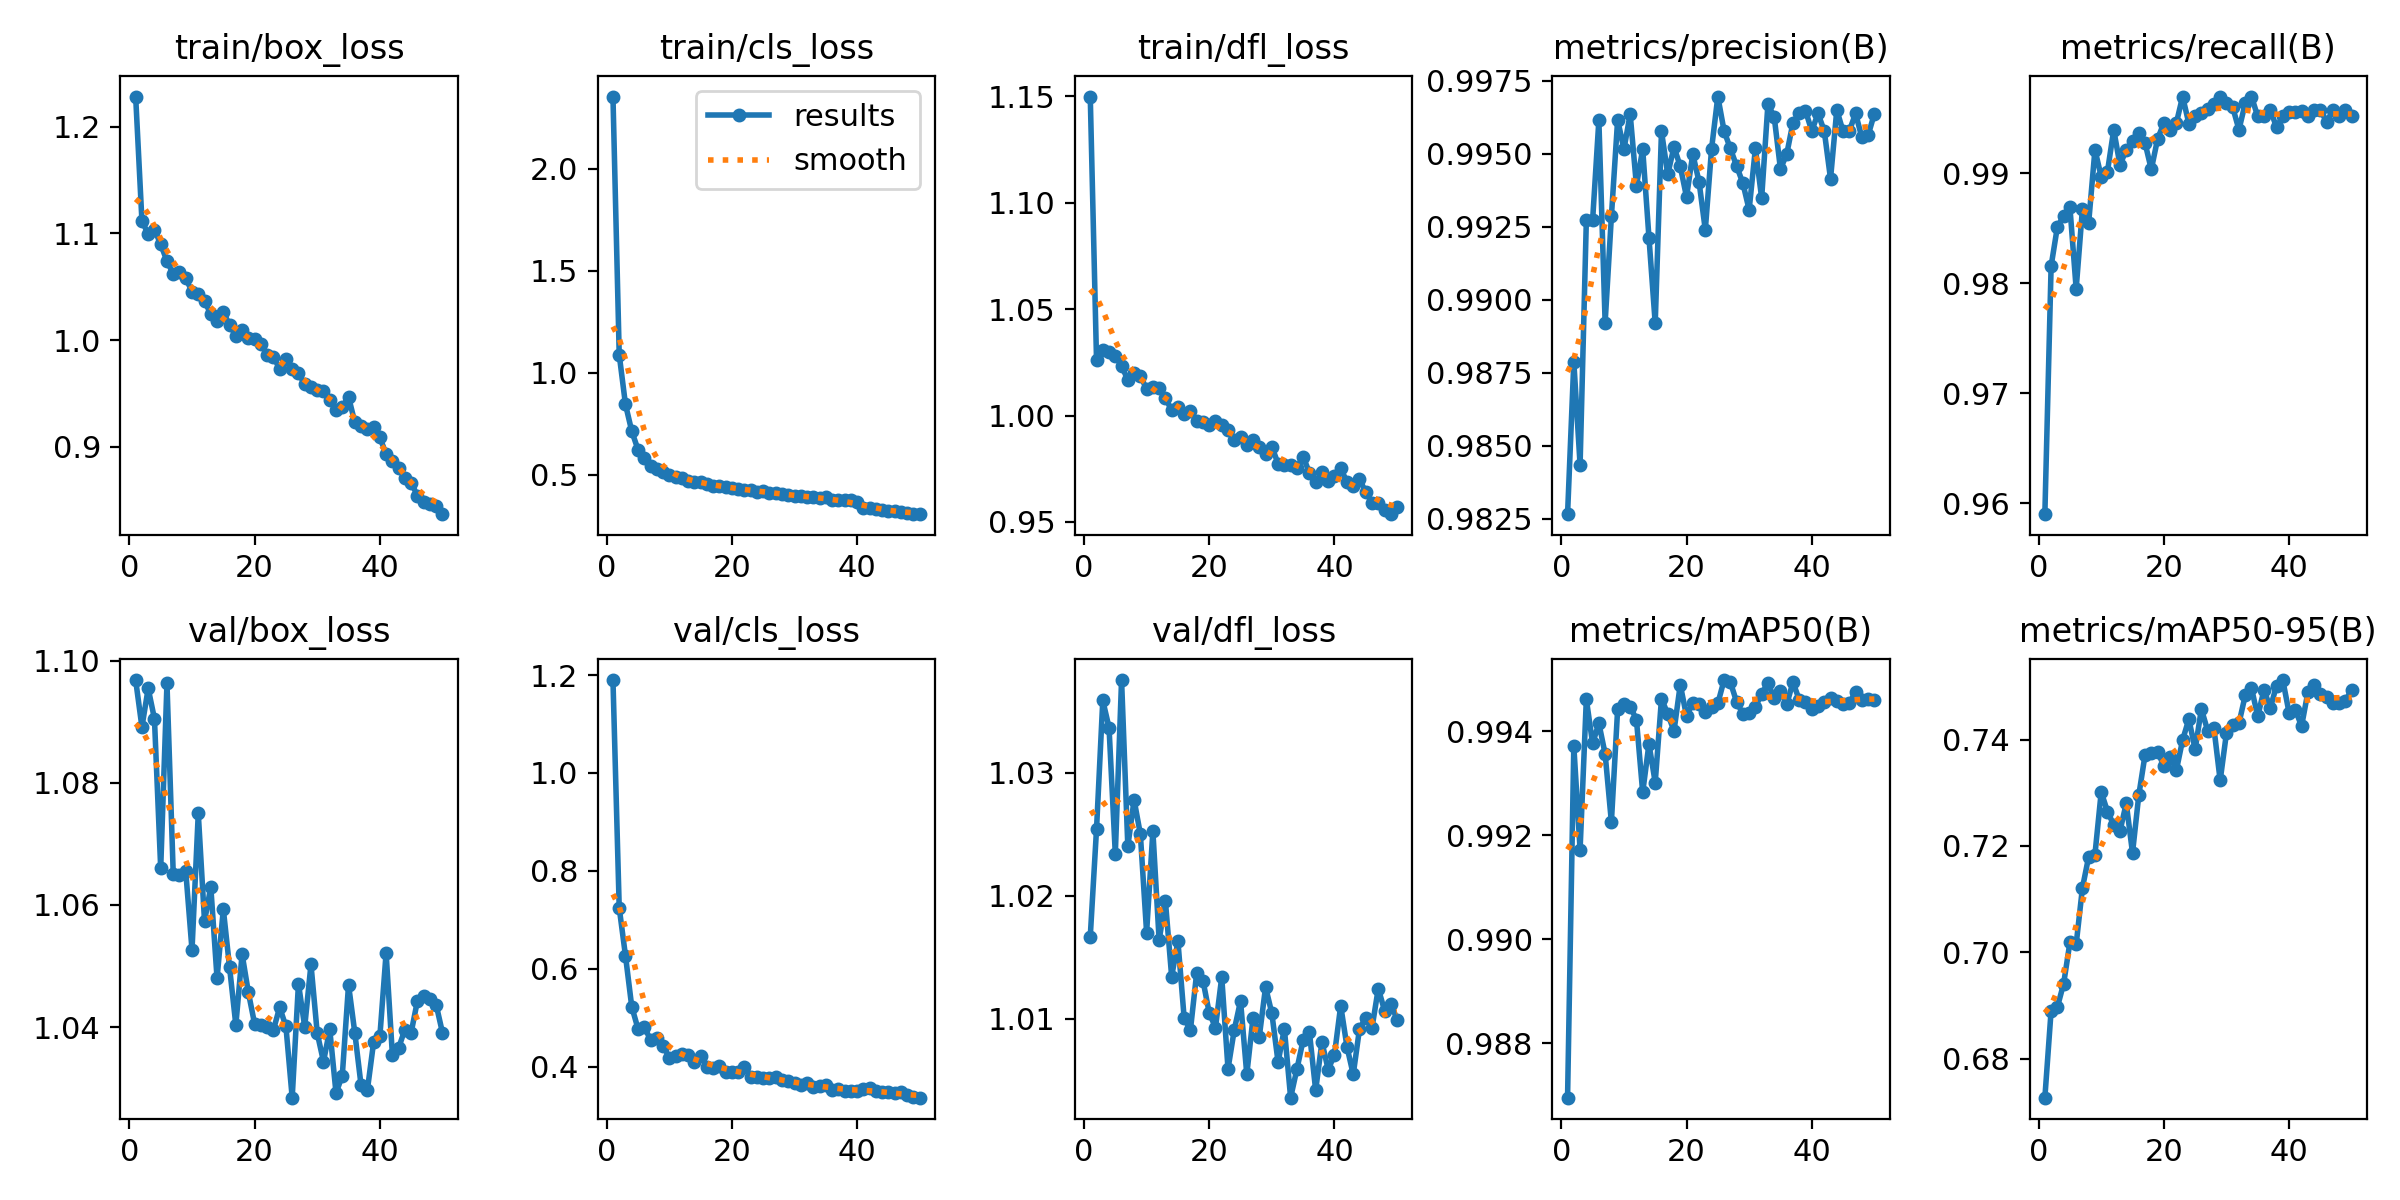


Hiển thị confusion_matrix.png:


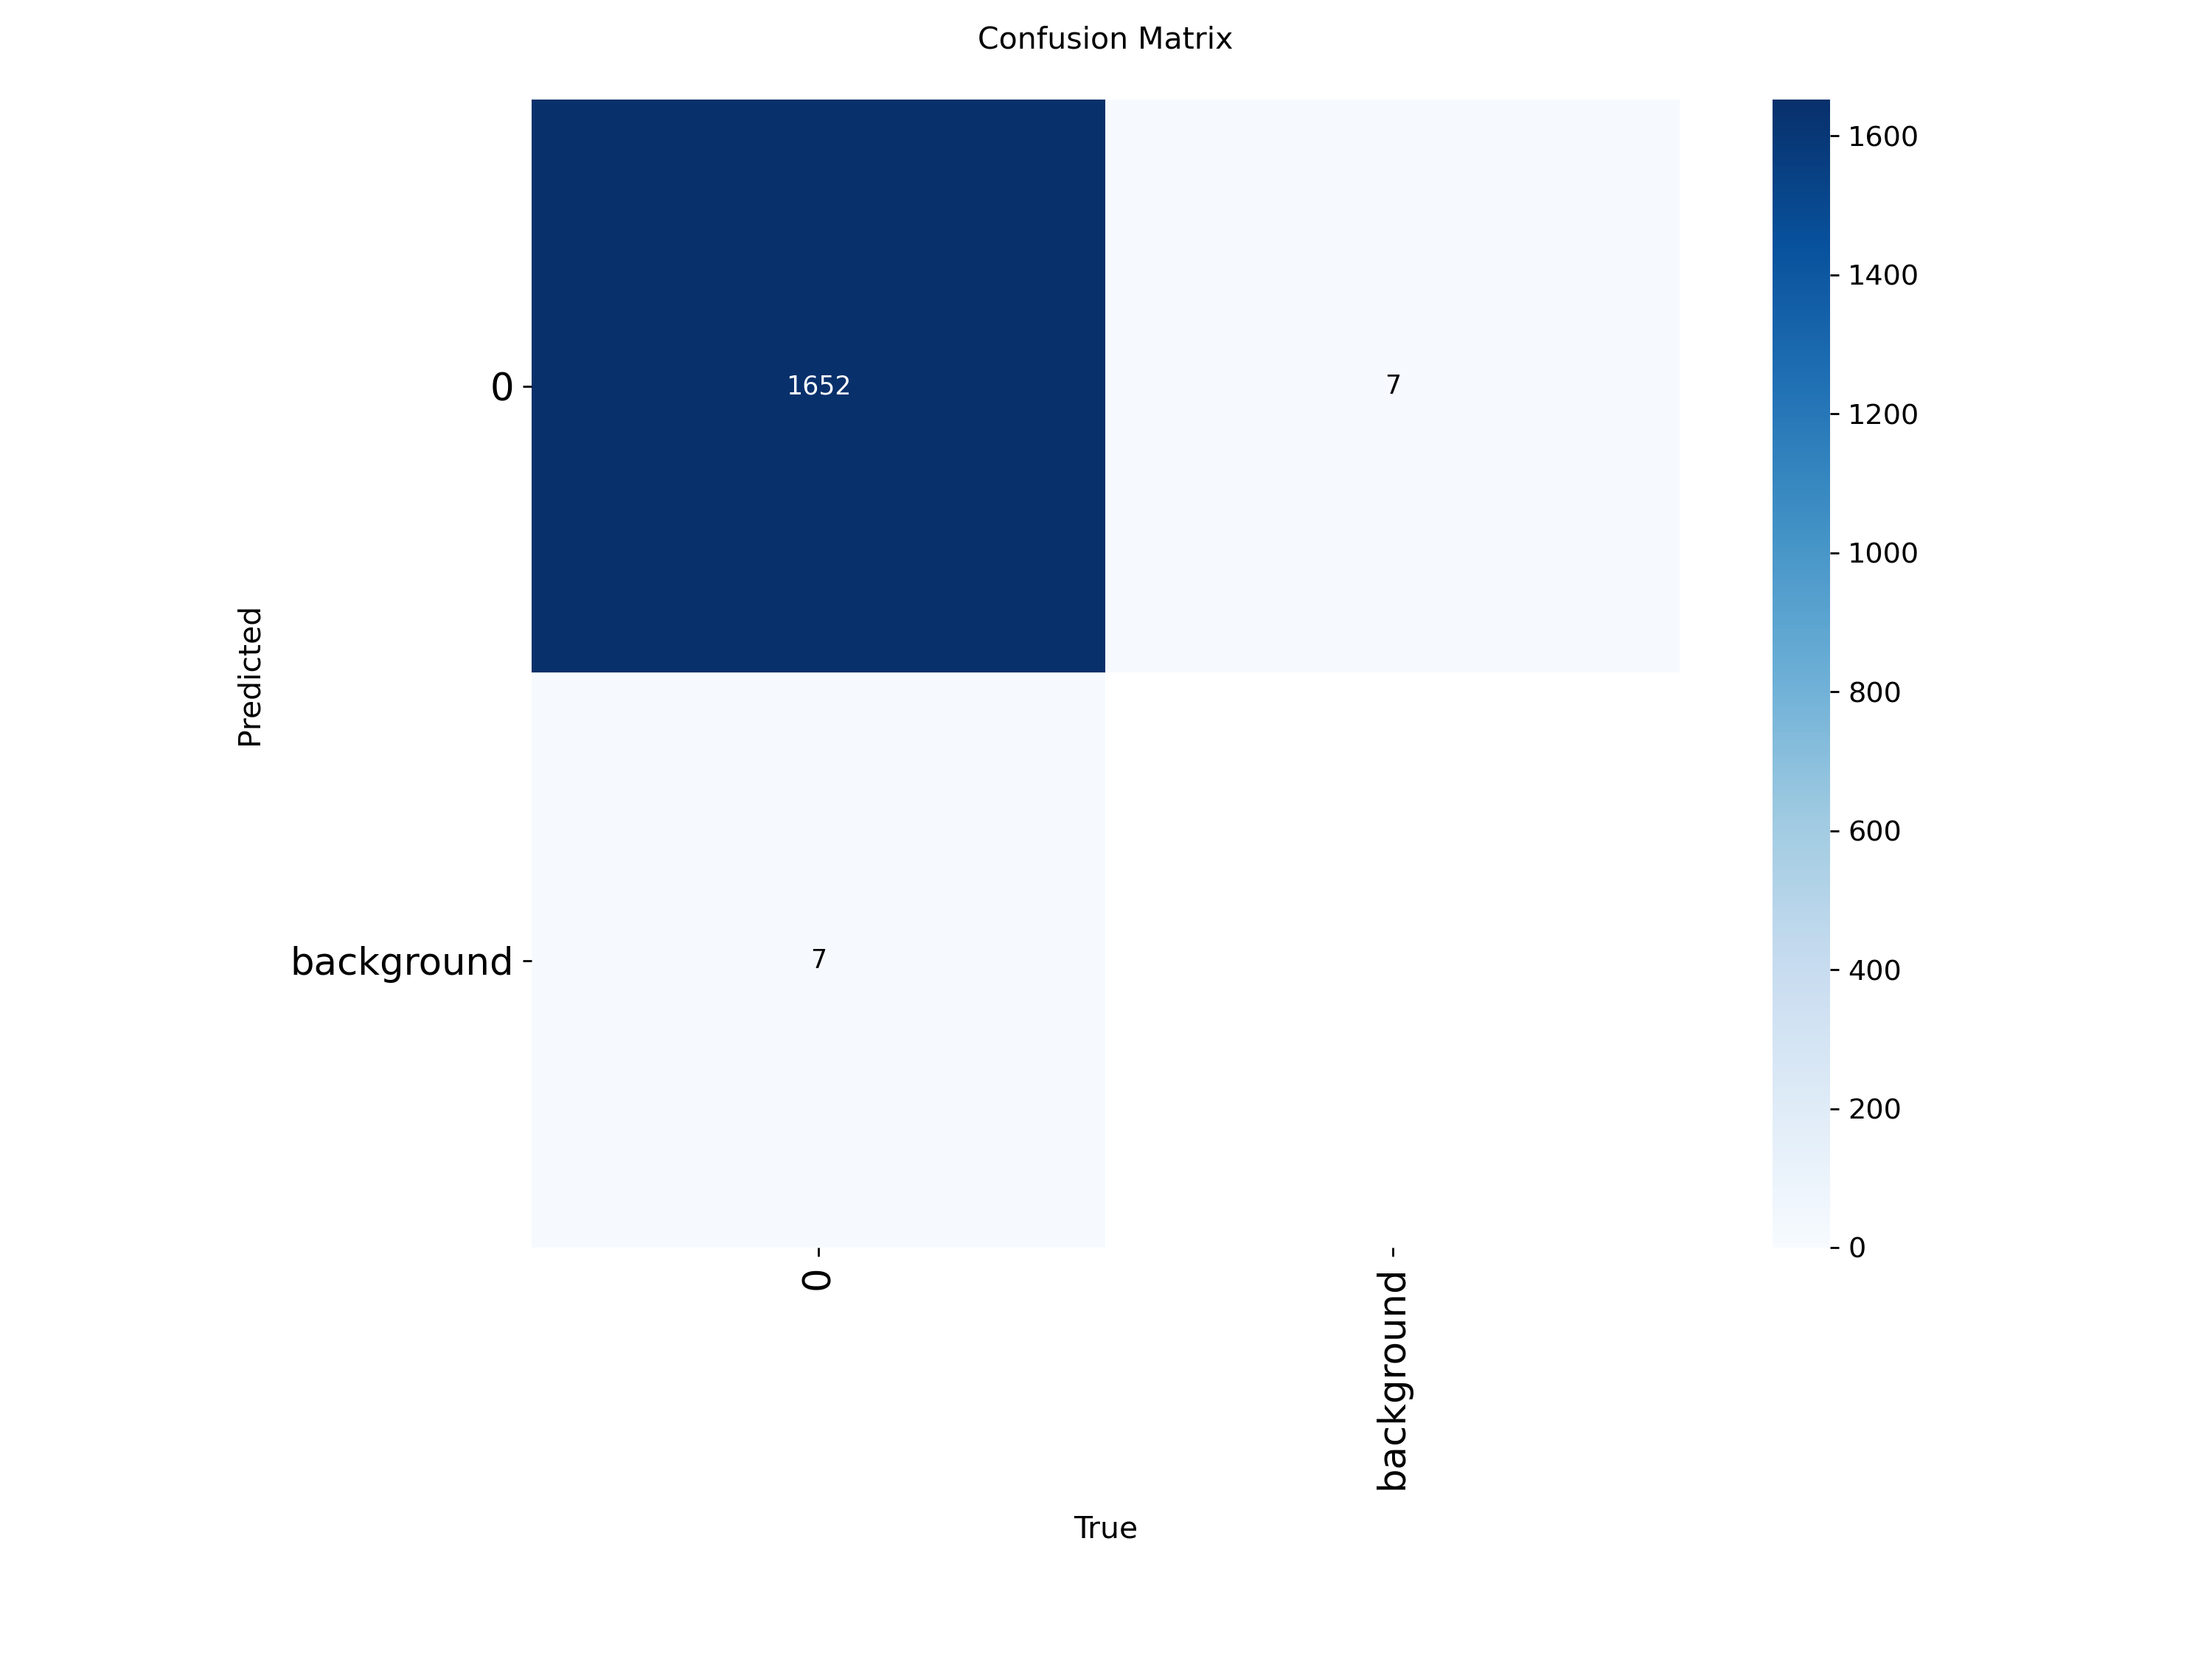


Hiển thị labels.jpg:


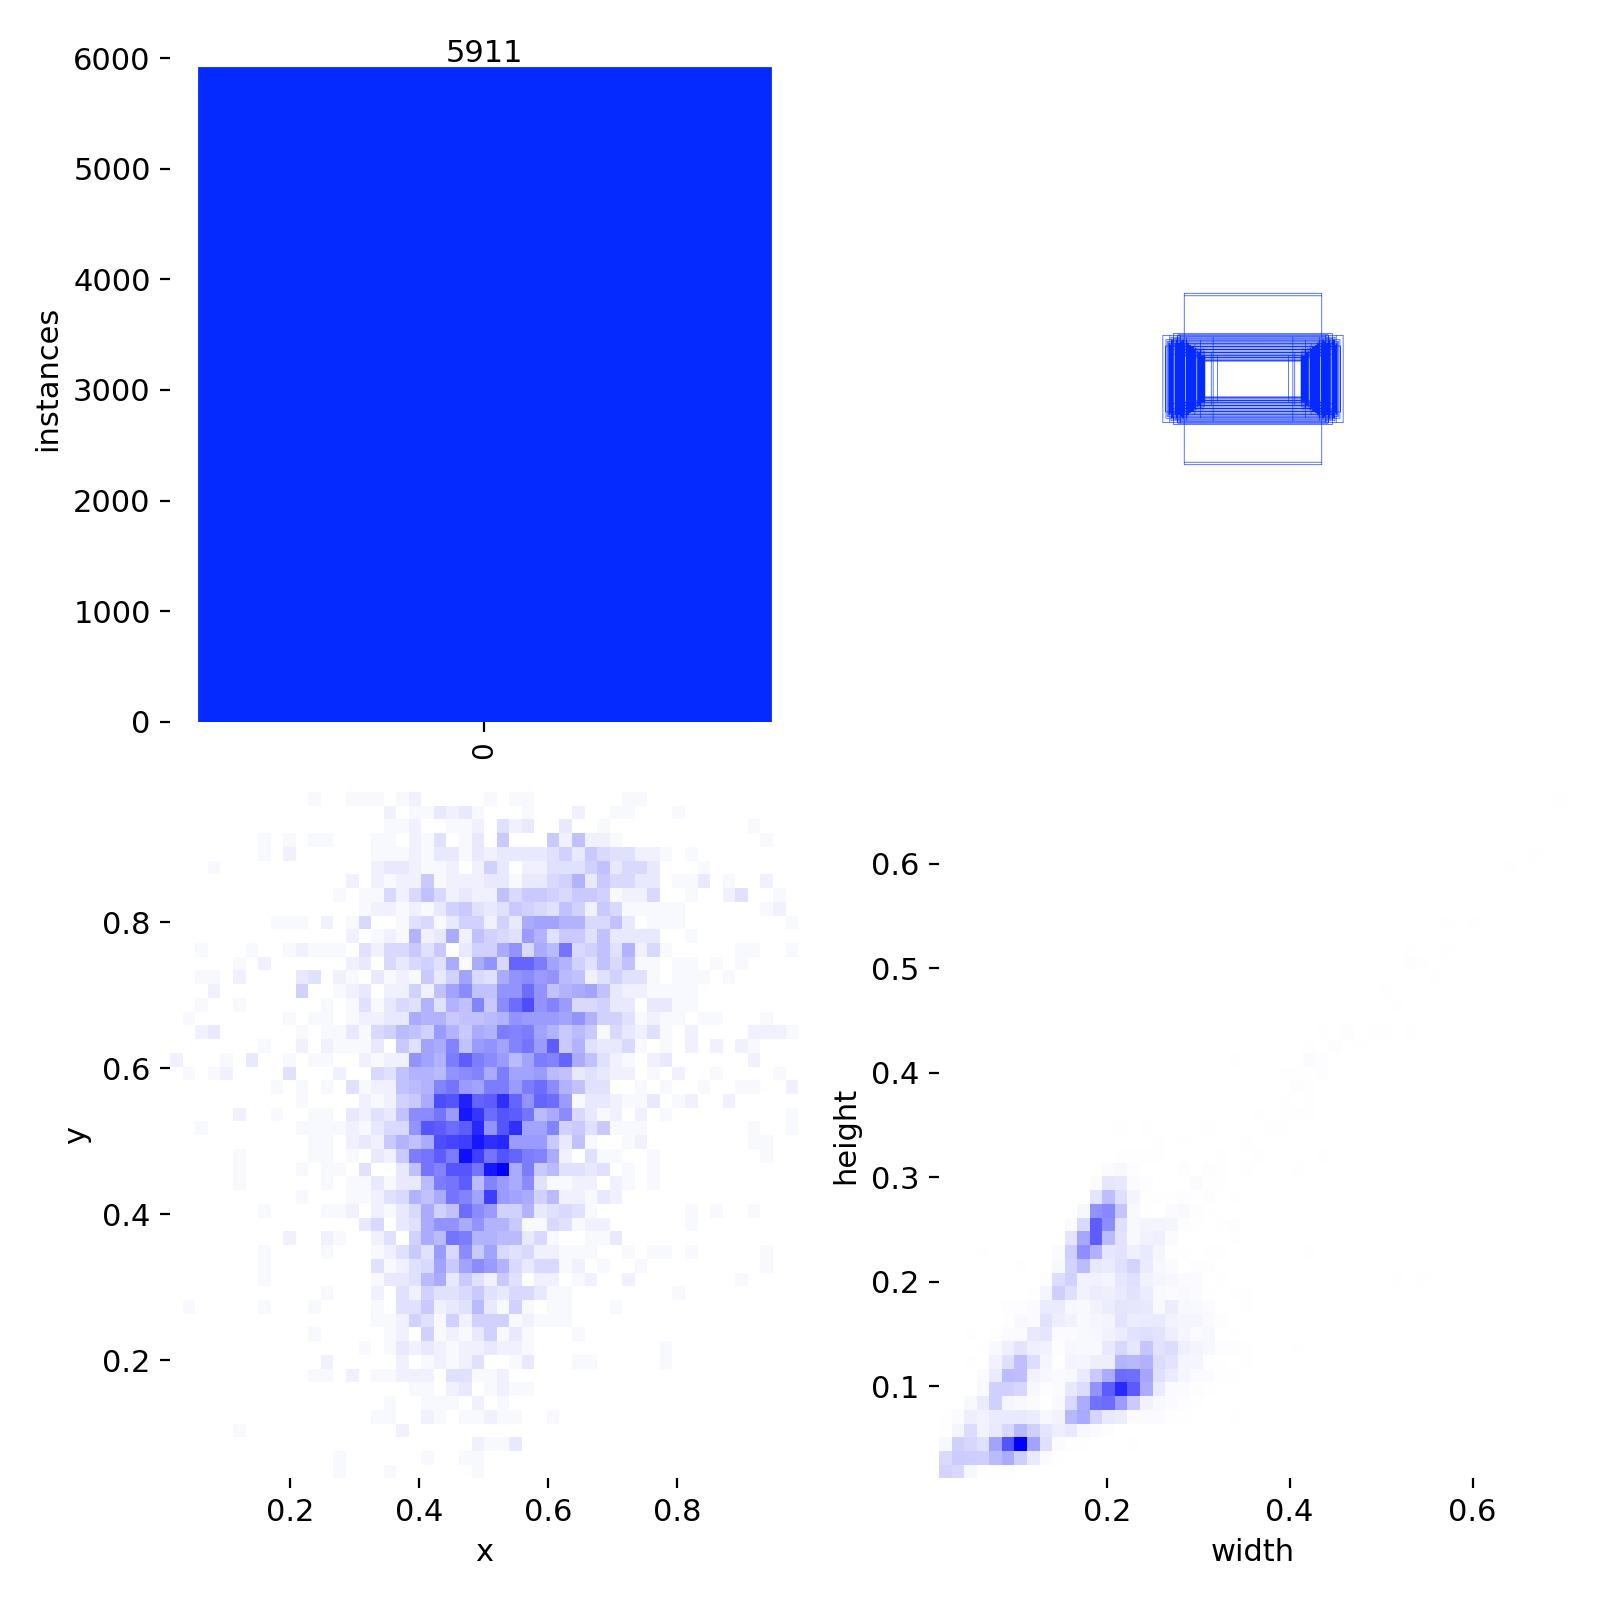

In [ ]:
import os
from IPython.display import Image, display

# Đường dẫn đến thư mục kết quả huấn luyện
results_dir = '/content/runs/detect/train'

# Liệt kê các tệp trong thư mục kết quả
print(f"Các tệp trong thư mục {results_dir}:")
for file in os.listdir(results_dir):
    print(file)

# Hiển thị biểu đồ kết quả (nếu có)
plots_to_display = ['results.png', 'confusion_matrix.png', 'labels.jpg']

for plot_file in plots_to_display:
    plot_path = os.path.join(results_dir, plot_file)
    if os.path.exists(plot_path):
        print(f"\nHiển thị {plot_file}:")
        display(Image(filename=plot_path))
    else:
        print(f"\nKhông tìm thấy {plot_file} tại {plot_path}")